# Example 1

This example illustrates the useage of the SimulateFMU package

## Imports

In [1]:
import os
import sys
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

sys.path.append(os.path.dirname(os.getcwd()))
from SimulateFMU import SimulateFMU

### Set parameters of the simulation

In [2]:
path_to_fmu = 'FMUs\Windows\SCooDER_Components_Controller_Model_Pv_0Inv_0VoltVarWatt_0simple_0Slim_0zerohold_0onlyPv_0firstorder.fmu'# Path to FMU file
timestep = 60*60 # seconds (1 hour = 60*60 seconds)
parameter = {'weather_file':'Resources\USA_CA_San.Francisco.Intl.AP.724940_TMY3.mos'} # No parameters for this model
channels = 'all' # Select the outputs to be displayed (either 'all' or [])
options = None # No model options for this model
start_time = 0 # Start time of the simulation
final_time = 60*60*24 # final time of the simulation (1 day = 60*60*24 seconds)

### Start a "stand-alone" simulation

In [3]:
example_single = SimulateFMU(path_to_fmu, timestep, parameter=parameter, channels=channels, sim_mode='single')
inputs = {} # No time-varying inputs for this model
example_single.simulate(start_time, final_time, inputs=inputs, options=options)

### Display the variables in the model

This function is useful when the structure of the model (inputs, outputs, parameter) is not known.

In [4]:
example_single.print_model_variables() # Print the variables

The Input variables are:
['v']

The Output variables are:
['Q', 'P']

The Parameters are:
              Value                               Description
weather_file                             Path to weather file
n                26                      Number of PV modules
A              1.65               Net surface area per module
eta           0.158              Module conversion efficiency
lat            37.9                                  Latitude
til              10                              Surface tilt
azi               0  Surface azimuth 0-S, 90-W, 180-N, 270-E 
thrP           0.05            P: over/undervoltage threshold
hysP           0.04                             P: Hysteresis
thrQ           0.04            Q: over/undervoltage threshold
hysQ           0.01                             Q: Hysteresis
SMax            7.6                    Maximal Apparent Power
QMaxInd         3.3        Maximal Reactive Power (Inductive)
QMaxCap         3.3       Maximal Reactive

### Start a "co-simulation" simulation

In [5]:
timestep = 5*60 # seconds Change timestep to 5 minutes
example_multiple = SimulateFMU(path_to_fmu, timestep, parameter=parameter, channels=channels, sim_mode='co-simulation')
for step in range(start_time, final_time, timestep):
    inputs = {'v':np.random.uniform(low=0.98, high=1.02)} # No inputs for this model
    outputs = example_multiple.do_step(step, inputs=inputs, options=options) # Returns the outputs to be fed in the next model
example_multiple.compile_output(start=datetime(datetime.now().year,1,1)) # Compile the output result (set start to 1/1/YYYY)

### Compare results

The difference between the two modes can be explained by the way the model is solved. In a "stand-alone" simulation, the model is solved by a solver with a variable timestep, with evaluations depeinding on the dynamics of the system. On the other hand, the "co-simulation" model is solved similarly to a fixed-timestep solver, because of the linkage step size ("timestep" in this example).

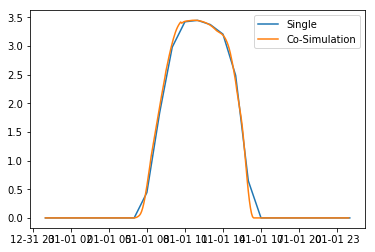

In [6]:
plt.plot(example_single.data['P'], label='Single')
plt.plot(example_multiple.data['P'], label='Co-Simulation')
plt.legend()
plt.show()

The advantage of the "co-simulation" mode is the linkage with external simulation tools (here emulated by a random number generator). In this fashion domain specific simulation tools can be linked together to form much larger, multi-domain simulation models.

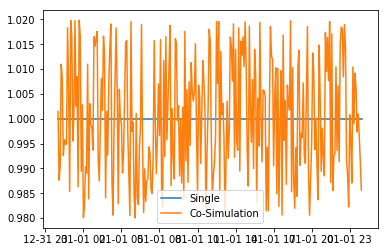

In [7]:
plt.plot(example_single.data['v'], label='Single')
plt.plot(example_multiple.data['v'], label='Co-Simulation')
plt.legend()
plt.show()